# UK Used Car Data Analysis - Volkswagen Models

## Import Libraries

In [1]:
import matplotlib as mpl

import matplotlib.pyplot as plt

import matplotlib.dates as md

from matplotlib.dates import DateFormatter

%matplotlib inline

import numpy as np

import seaborn as sns

import pandas as pd

import statsmodels.api as sm

from datetime import datetime

In [2]:
df = pd.read_csv('vw.csv')

## Dataframe

In [3]:
df

,model,fuelType,transmission,price,mileage,tax,mpg,engineSize,year
0,T-Roc,Diesel,Automatic,25000,13904,145,49.6,2.0,2019
1,T-Roc,Diesel,Automatic,26883,4562,145,49.6,2.0,2019
2,T-Roc,Diesel,Manual,20000,7414,145,50.4,2.0,2019
3,T-Roc,Petrol,Automatic,33492,4825,145,32.5,2.0,2019
4,T-Roc,Petrol,Semi-Auto,22900,6500,150,39.8,1.5,2019
...,...,...,...,...,...,...,...,...,...
15152,Eos,Diesel,Manual,5990,74000,125,58.9,2.0,2012
15153,Fox,Petrol,Manual,1799,88102,145,46.3,1.2,2008
15154,Fox,Petrol,Manual,1590,70000,200,42.0,1.4,2009
15155,Fox,Petrol,Manual,1250,82704,150,46.3,1.2,2006


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   fuelType      15157 non-null  object 
 2   transmission  15157 non-null  object 
 3   price         15157 non-null  int64  
 4   mileage       15157 non-null  int64  
 5   tax           15157 non-null  int64  
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
 8   year          15157 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [5]:
df.describe()

,price,mileage,tax,mpg,engineSize,year
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,16838.952365,22092.785644,112.744277,53.753355,1.600693,2017.255789
std,7755.015206,21148.941635,63.482617,13.642182,0.461695,2.053059
min,899.000000,1.000000,0.000000,0.300000,0.000000,2000.000000
25%,10990.000000,5962.000000,30.000000,46.300000,1.200000,2016.000000
50%,15497.000000,16393.000000,145.000000,53.300000,1.600000,2017.000000
75%,20998.000000,31824.000000,145.000000,60.100000,2.000000,2019.000000
max,69994.000000,212000.000000,580.000000,188.300000,3.200000,2020.000000


# _Insights_

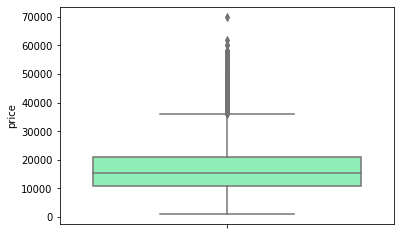

In [6]:

sns.boxplot(y="price", data=df,palette='rainbow')
plt.show()


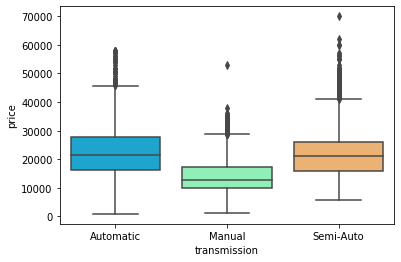

In [7]:
sns.boxplot(x="transmission", y="price", data=df,palette='rainbow')
plt.show()

In [8]:
#Automatic and Semi-Auto seem similar in price
#Potentially have them the same to keep things easier
#May just have automatic AND manual transmission 

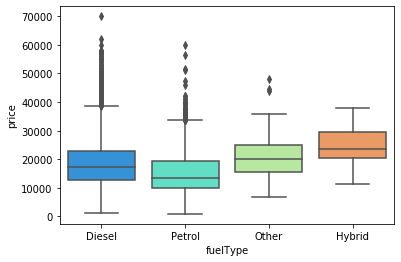

In [9]:
sns.boxplot(x="fuelType", y="price", data=df,palette='rainbow')
plt.show()

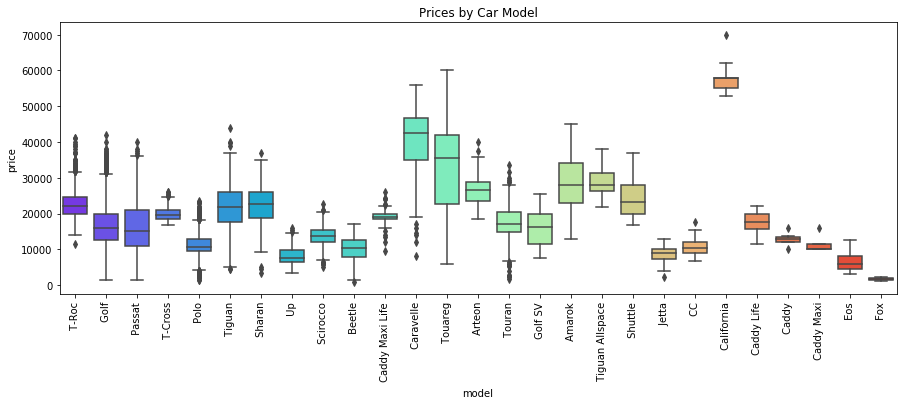

In [10]:
#Prices by Model
fig, axes = plt.subplots(figsize=(15,5))

sns.boxplot(x="model", y="price", data=df, palette='rainbow')

axes.set_title('Prices by Car Model')
plt.setp(axes.get_xticklabels(), rotation = 90)

plt.show()


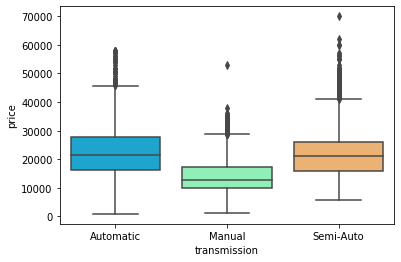

In [11]:
#Transmission
sns.boxplot(x="transmission", y="price", data=df, palette='rainbow')
plt.show()


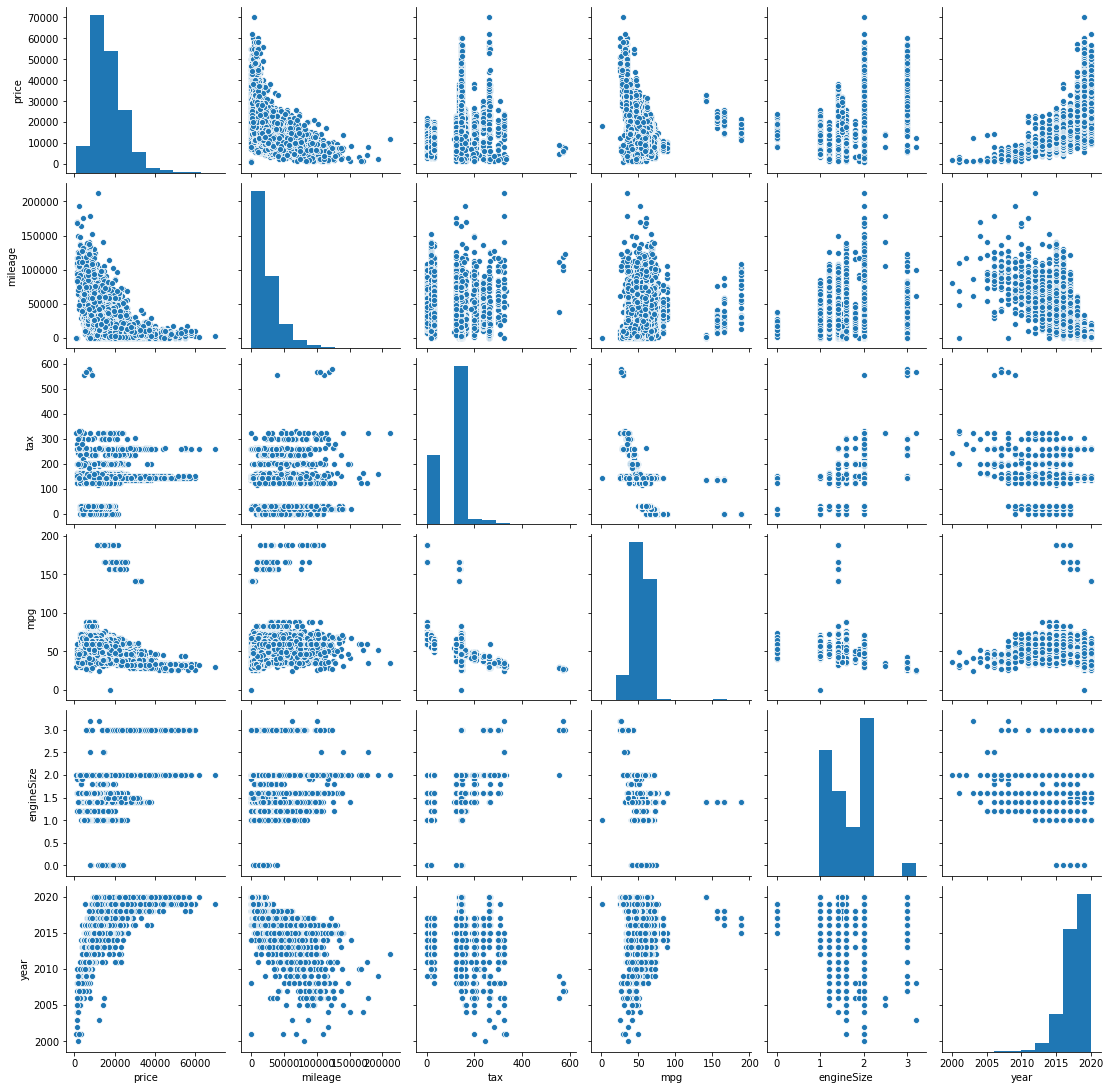

In [12]:
sns.pairplot(df)
plt.show()

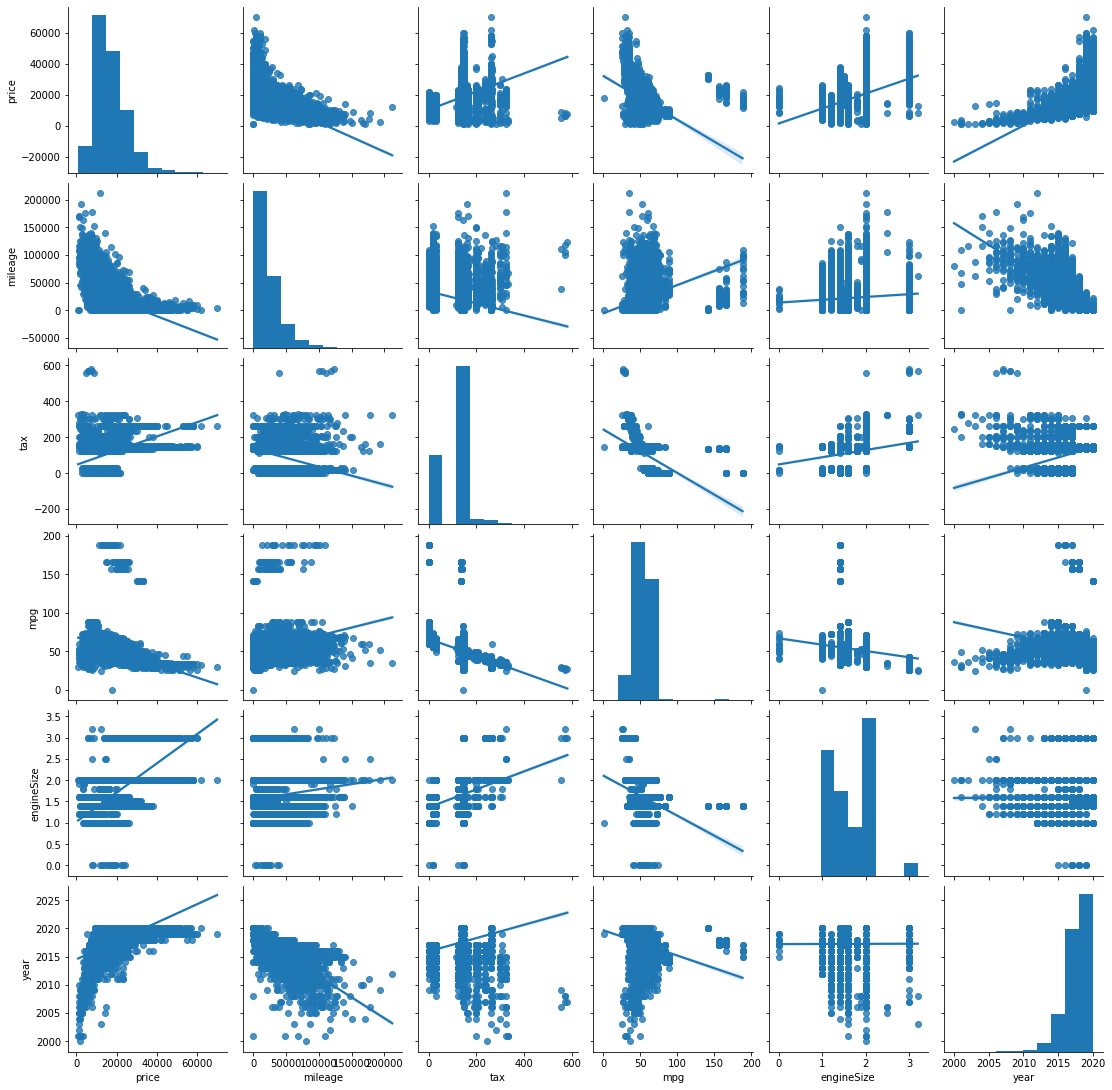

In [13]:
sns.pairplot(df,kind='reg')
plt.show()

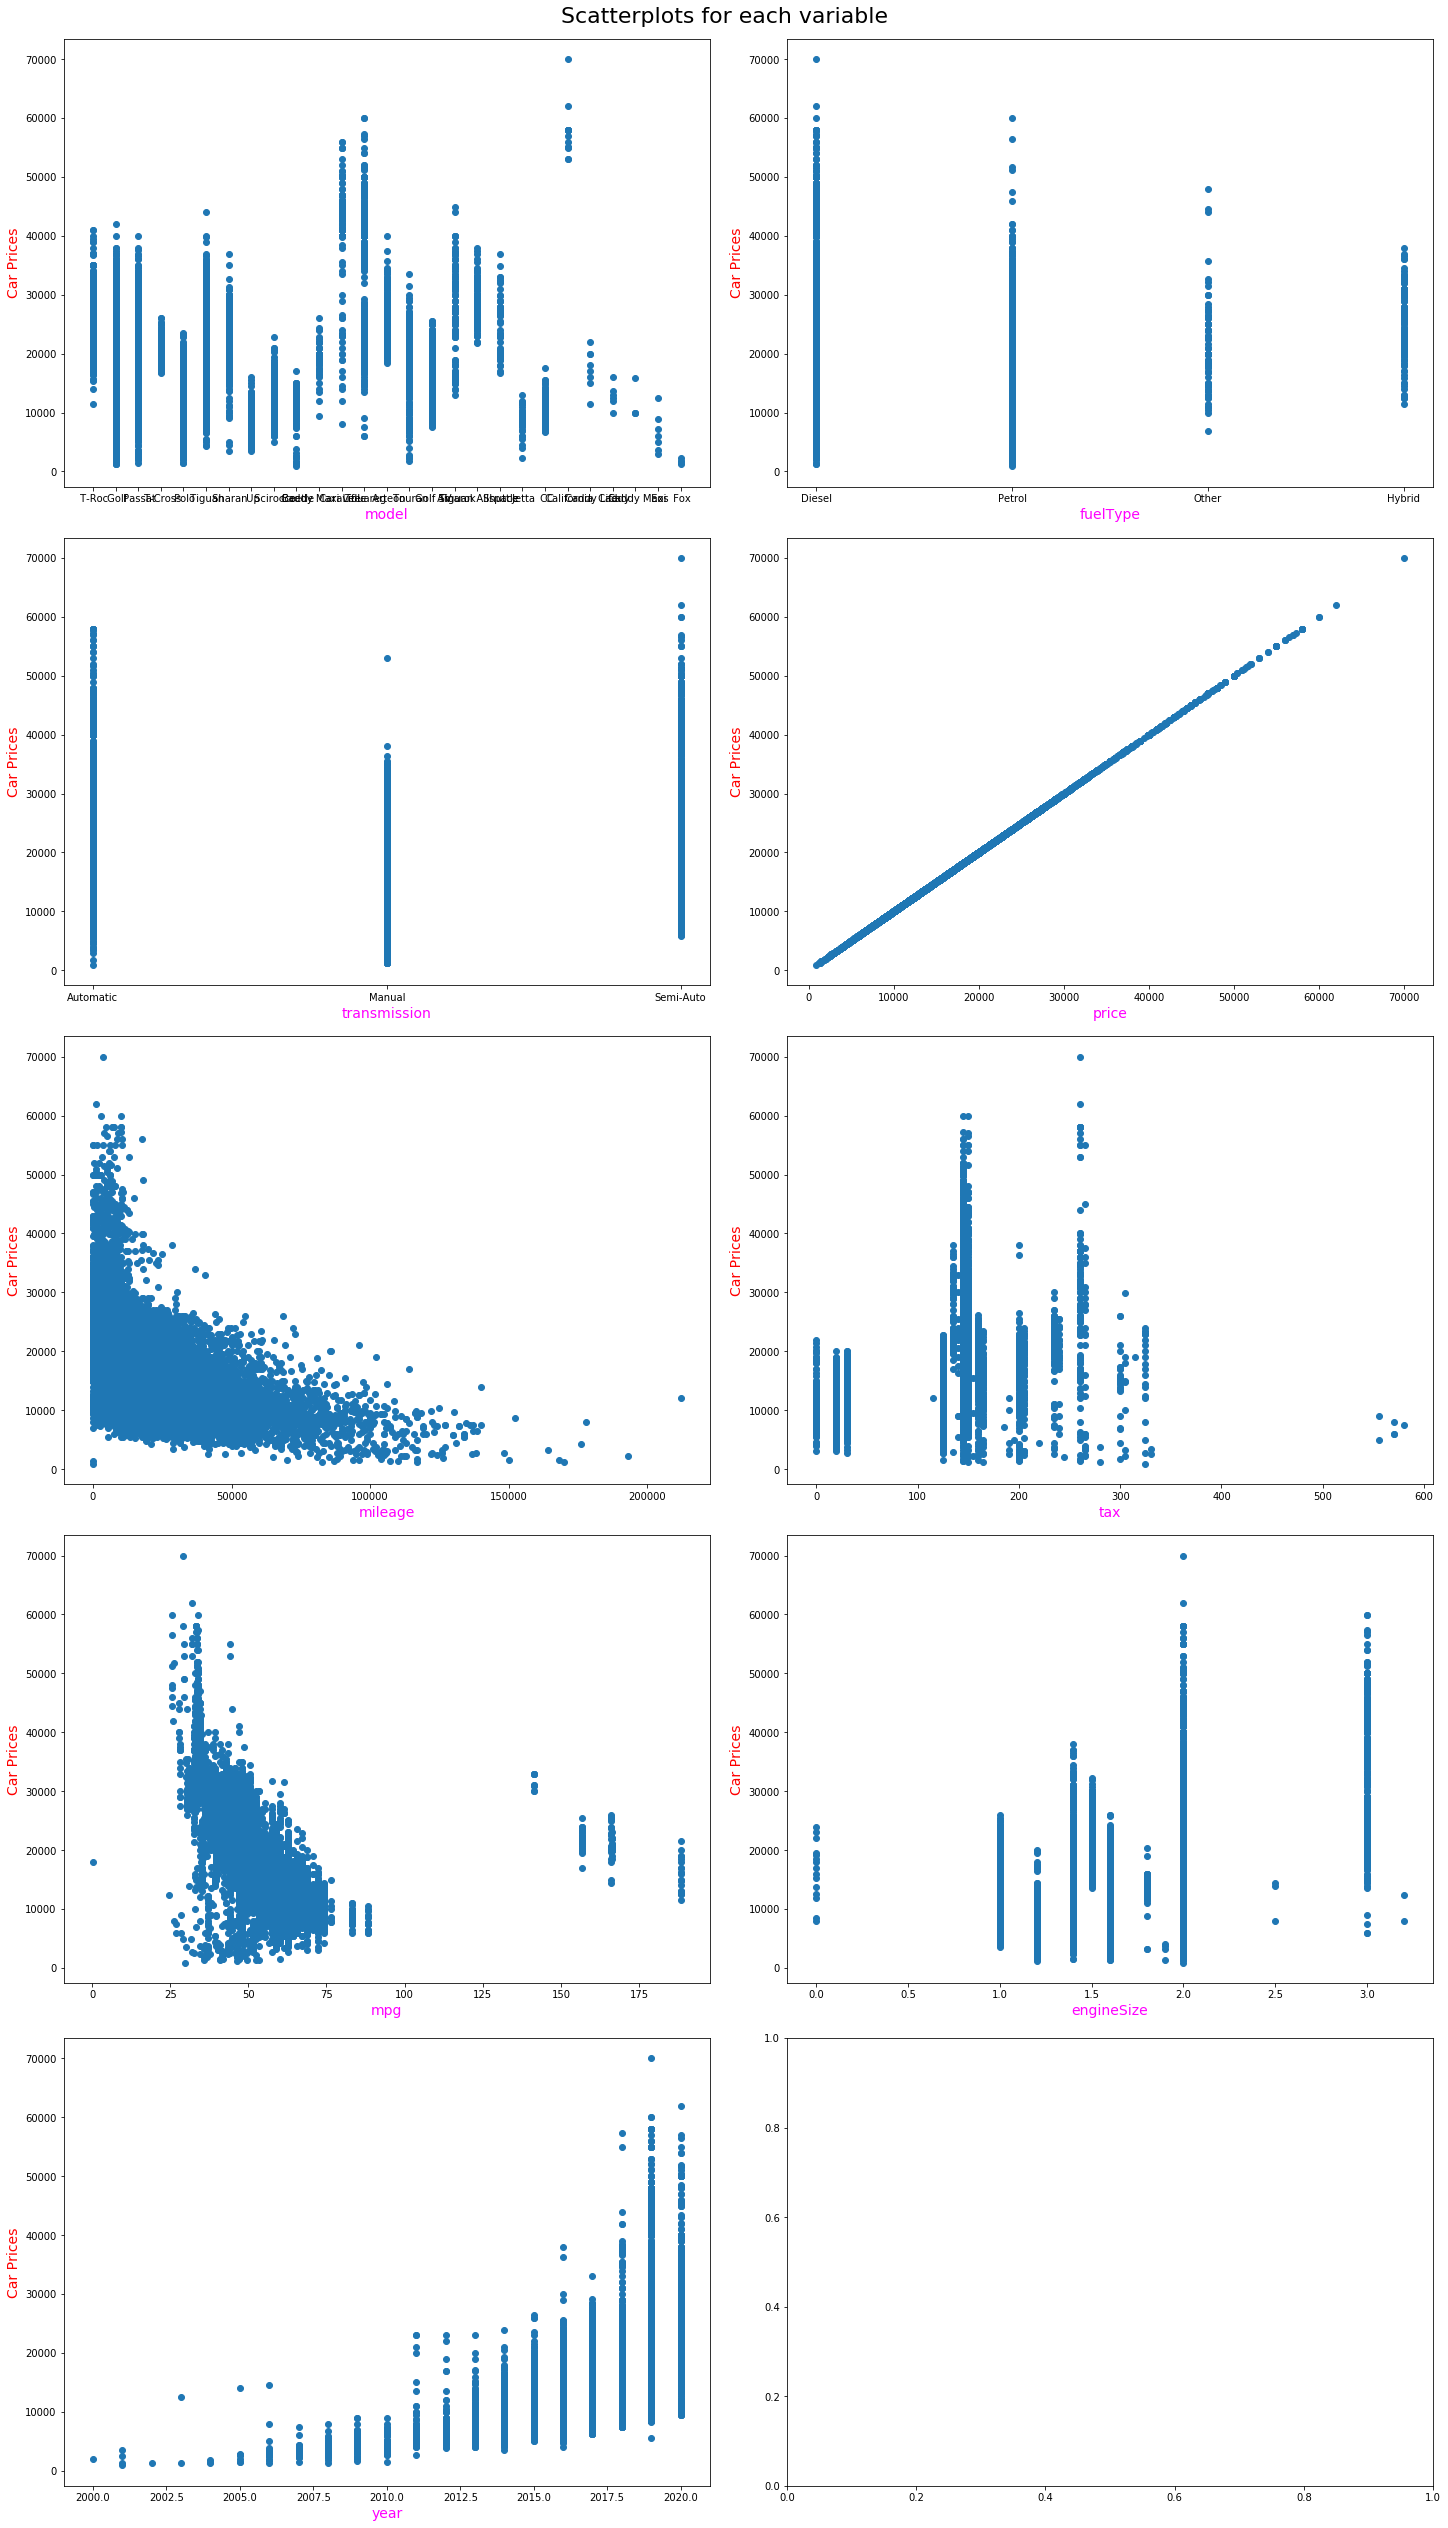

In [14]:
#Scatter Plot of "Price" vs other variables

dep_var = df['price']
ind_vars = df

fig, axes = plt.subplots(5, 2, figsize=(20, 35), constrained_layout=True)
fig.suptitle('Scatterplots for each variable', size=22)
axes = axes.flatten()

for i, y in enumerate(ind_vars):
    ax=axes[i]
    ax.set_xlabel(y, color='magenta', size=14)
    ax.set_ylabel('Car Prices', color='red', size=14)
    ax.plot(ind_vars[y], dep_var, marker='o', linestyle='')

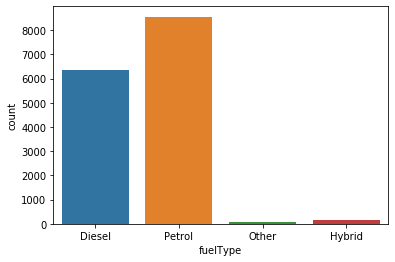

In [15]:
#Fuel Type Count Plot
sns.countplot(df.fuelType, label = "Count")
plt.show()

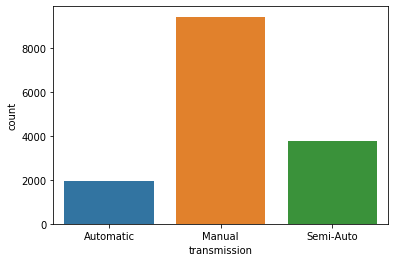

In [16]:
#Transmission Type Count Plot
sns.countplot(df.transmission, label = "Count")
plt.show()

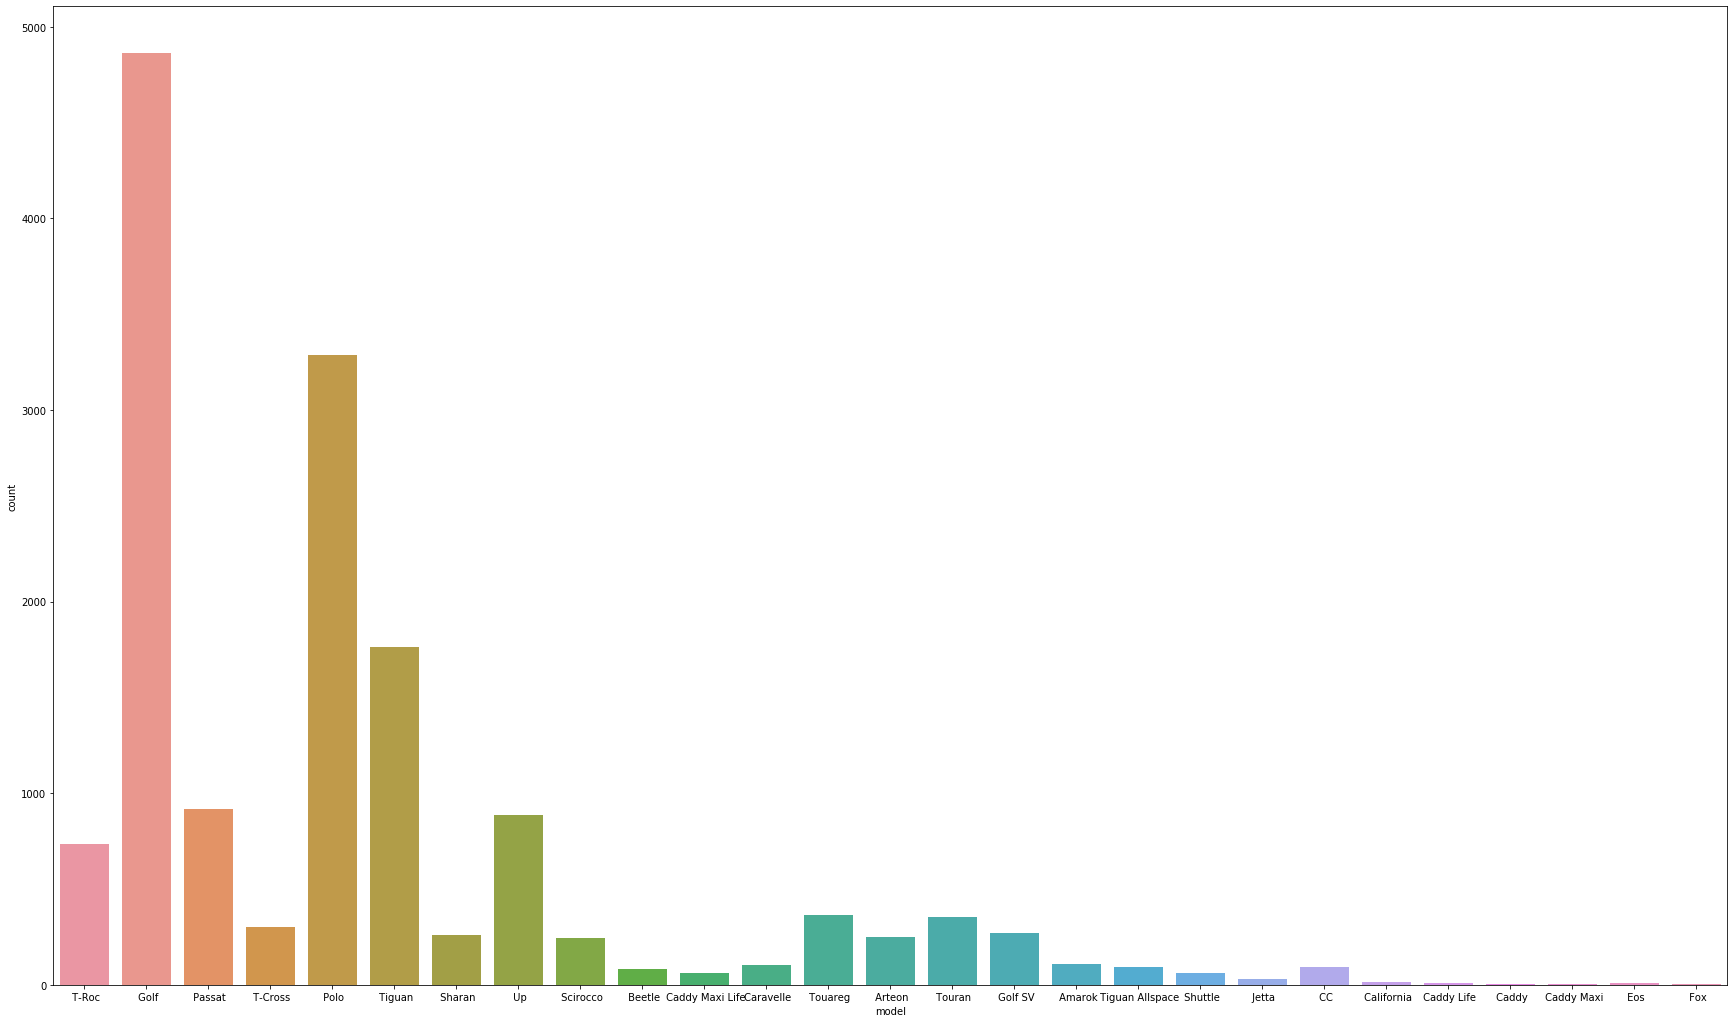

In [17]:
# Count plot on model
plt.subplots(figsize=(30,18))
sns.countplot(df.model, label = "Count")
plt.show()

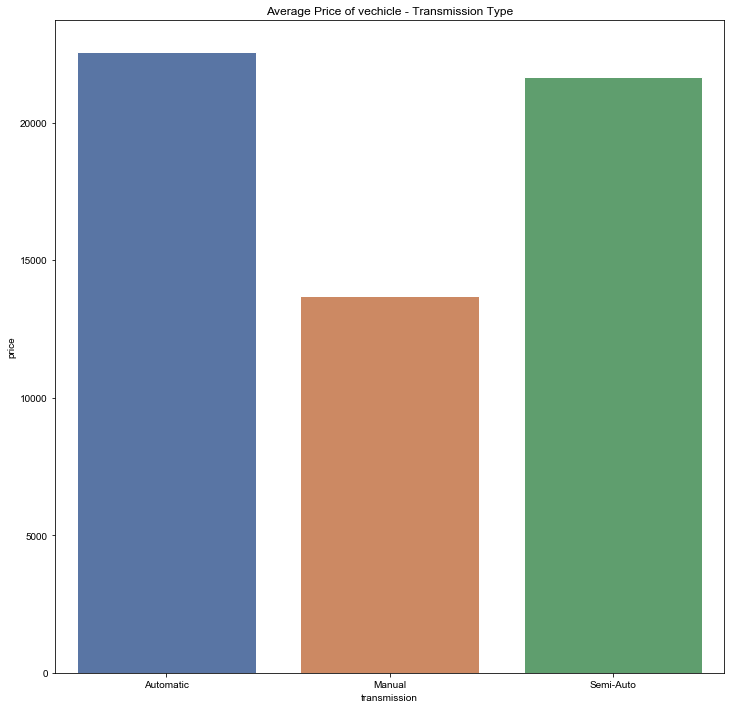

In [18]:
#Avg price of vehicle by Transmission Type
plt.subplots(figsize=(12,12))
price_by_transmission = df.groupby("transmission")['price'].mean().reset_index()
plt.title("Average Price of vechicle - Transmission Type")
sns.set()
sns.barplot(x="transmission", y ="price", data = price_by_transmission)
plt.show()

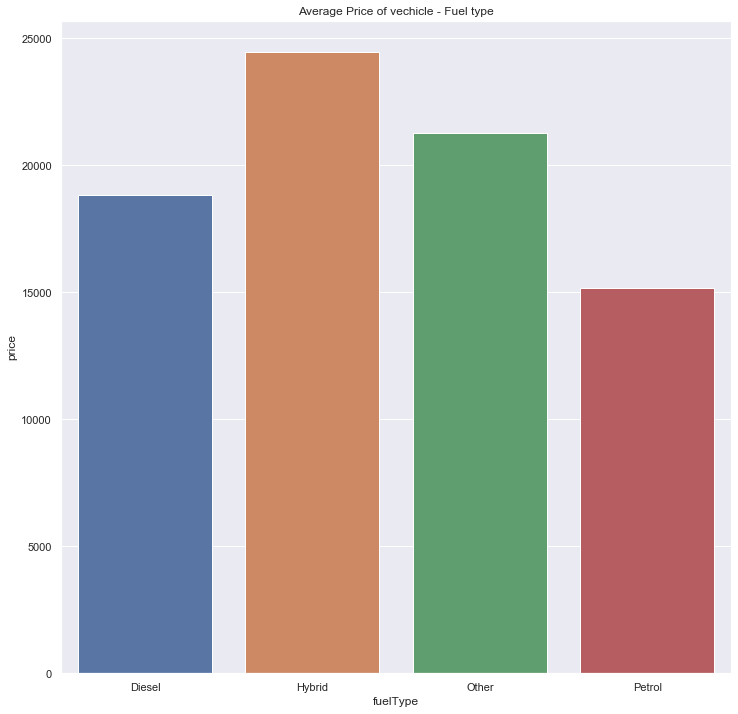

In [19]:
# Checking the price by fueltype
plt.subplots(figsize=(12,12))
price_by_fuel = df.groupby("fuelType")['price'].mean().reset_index()
plt.title("Average Price of vechicle - Fuel type")
sns.set()
sns.barplot(x="fuelType", y ="price", data = price_by_fuel)
plt.show()

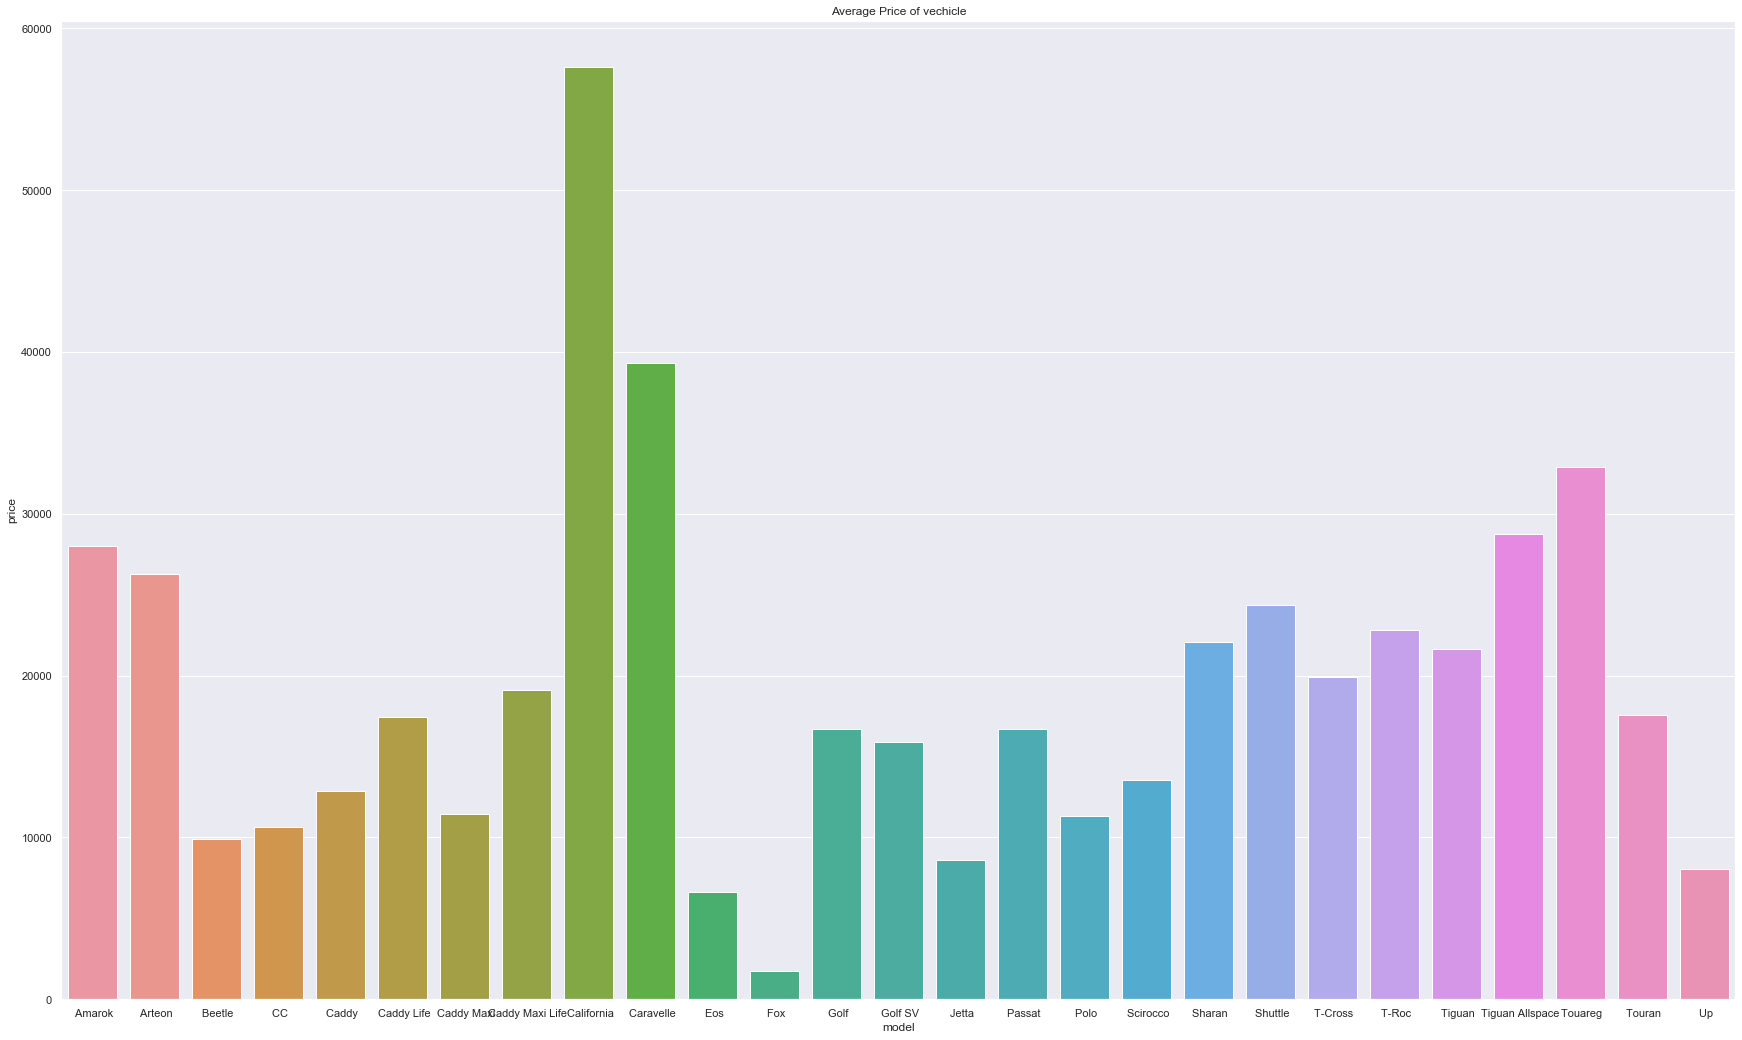

In [20]:
# Checking the price by model
plt.subplots(figsize=(30,18))
price_by_model = df.groupby("model")['price'].mean().reset_index()
plt.title("Average Price of vechicle")
sns.set()
sns.barplot(x="model", y ="price", data = price_by_model)
plt.show()

## Heatmap

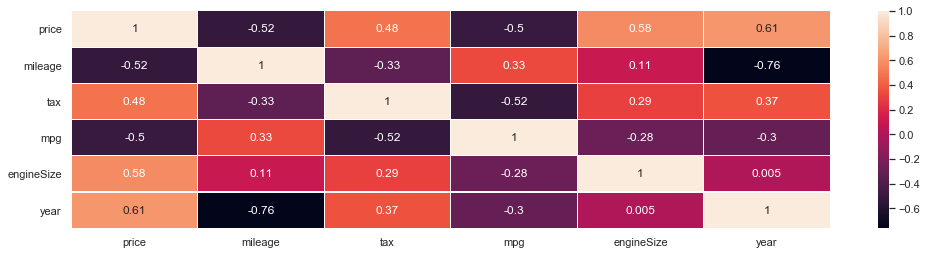

In [21]:
mpl.rcParams['figure.figsize'] = (17,4)

corr = df.corr()
sns.heatmap(corr, annot=True, linewidth=0.2)
plt.show()

## Barchart - Correlating features, in regards to Price 

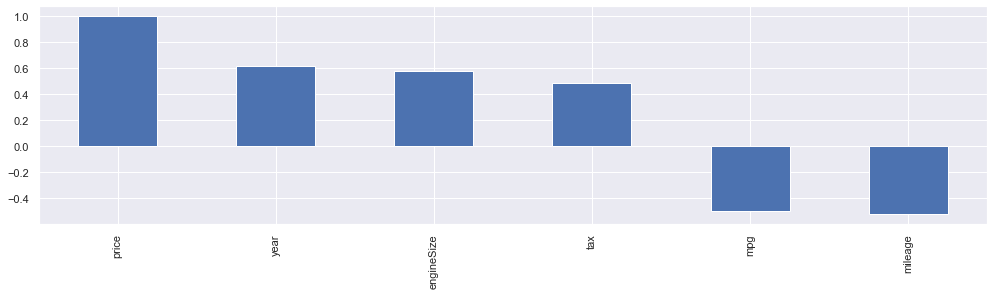

In [22]:
mpl.rcParams['figure.figsize'] = (17,4)

corr2 = corr['price'].sort_values(ascending=False)
corr2.plot(kind='bar')
plt.show()

## OLS Regression

In [23]:
# Declaring the dependent variable against indepedent variables
# Raw Data first
dependentVar = df['price']
filt = ['mileage', 'tax', 'mpg', 'engineSize', 'year']

x = sm.add_constant(df[filt])
 
results = sm.OLS(dependentVar, x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     9392.
Date:                Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:            -1.4656e+05
No. Observations:               15157   AIC:                         2.931e+05
Df Residuals:                   15151   BIC:                         2.932e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.915e+06   4.83e+04    -60.354      0.000   -3.01e+06   -2.82e+06
mileage       -0.0840      0.002    -35.320      0.000      -0.089      -0.079
tax            4.4157      0.608      7.261      0.000       3.224       5.608
mpg          -77.4880      2.782    -27.853      0.000     -82.941     -72.035
engineSize  9242.9989     74.255    124.477      0.000    9097.450    9388.548
year        1448.7386     23.935     60.528      0.000    1401.823    1495.654
==============================================================================
Omnibus:                     7346.353   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80356.893
Skew:                           2.063   Prob(JB):                         0.00
Kurtosis:                      13.498   Cond. No.                     4.75e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictive Price Model

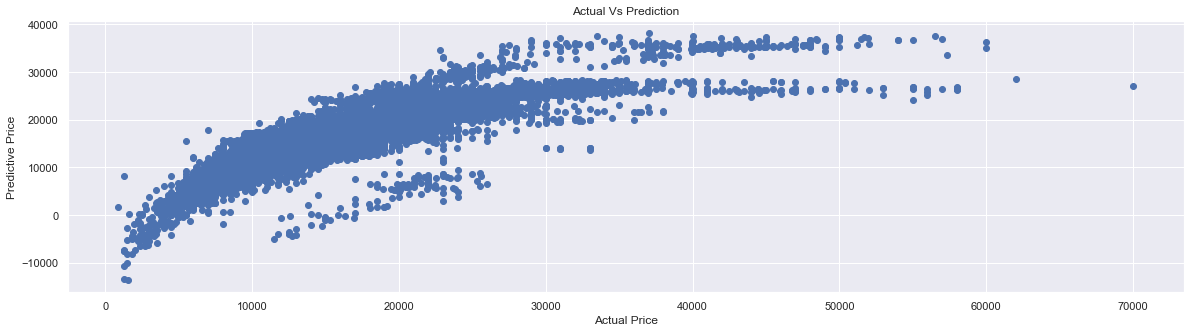

In [24]:
mpl.rcParams['figure.figsize'] = (20, 5)

predictions = results.predict(x)

plt.scatter(dependentVar, predictions)
plt.title('Actual Vs Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predictive Price')
plt.show()